# Neural Networks Learning

### Introduction

We will use the same dataset as the exercise 4, but this time we will train a neural network to classify the data.

The data is composed of handwritten digits (from 0 to 9) and is a subset of the [MNIST handwritten digit dataset] (http://yann.lecun.com/exdb/mnist/)

The first step is to apply a neural network using the same parameters as the Octave version (alpha 1, 50 iterations and a hidden layers of 25). Then we change those parameters and see the effects on prediction accuracy.

### Reading and visualizing the data

The data comes from a .mat file and it contains a matrix x and a vector y.

x is a 5000 x 400 matrix that contains 5000 samples where each row is a extended array representing a 20 x 20 image. y is a 5000 vector that contains the correct digit, ranging from 1 to 10 (the 0 digit is represent as 10).

To display the images, we will definy two functions. The getImg() function will take a 1x400 vector and transforms into a 20x20 matrix (representing the image). The displayData() will take 100 random rows from x, create images from it and displays a 10x10 grid with those images.

In [1]:
import scipy.io
mat = scipy.io.loadmat('ex4data1.mat')
x = mat['X']
y = mat['y'].reshape(-1,1).ravel()

In [13]:
def getImg(row):
    width, height = 20, 20
    square = row.reshape(width,height)
    return square.T

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display

def displayData(indices_to_display = None):
    width, height = 20, 20
    nrows, ncols = 10, 10
    indices_to_display = random.sample(range(x.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getImg(x[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    plt.imshow(big_picture, cmap = cm.Greys_r)

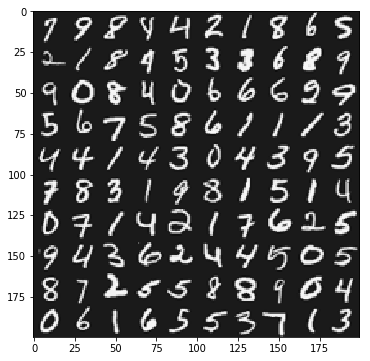

In [16]:
displayData()

### Classification

First, we define a function that accepts three parameters (alpha, hidden_layer_sizes and max_iter), instanciate and print the neural network and returns the accuracy.

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def classify_image(alpha, hidden_layer_sizes, max_iter):
    nn = MLPClassifier(activation='logistic', solver='lbfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=max_iter)
    nn.fit(x,y)
    predictions = nn.predict(x)
    accuracy = accuracy_score(predictions, y)
    print("The prediction accuracy is {} %".format(accuracy * 100))


In [18]:
classify_image(1, 25, 50)

The prediction accuracy is 98.22 %
